# Topic: Sentiment Analysis of Social Media Content

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df = pd.read_csv("data/sentimentdataset.csv")

### Editing and Cleaning DataFrame

In [37]:
# Editing
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df.rename(columns={'Retweets': 'Reposts'}, inplace=True)
# Cleaning
cols = ['Sentiment', 'User', 'Platform', 'Country']
df[cols] = df[cols].apply(lambda x : x.str.strip())

### Data Preview

In [38]:
df.head()
df.tail()
df.sample(5)
df.info()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Reposts,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Reposts,Likes,Country,Year,Month,Day,Hour
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Reposts,Likes,Country,Year,Month,Day,Hour
474,Serenading the stars with a heart full of grat...,Gratitude,2017-12-22 21:00:00,StarSerenader,Twitter,#Gratitude #ThankfulMelody,22.0,45.0,India,2017,12,22,21
283,"Navigating the river of contentment, a serene...",Contentment,2019-04-27 09:50:00,RiverNavigator,Instagram,#Contentment #TranquilWaters,20.0,40.0,Canada,2019,4,27,9
238,"Wrapped in the cloak of emotional numbness, a...",Numbness,2021-11-30 15:30:00,TurbulentShield,Instagram,#Numbness #EmotionalStorms,10.0,20.0,Canada,2021,11,30,15
377,Pensive contemplation amid the ancient ruins o...,Pensive,2023-04-18 17:10:00,RuinsExplorer,Twitter,#Pensive #AncientCivilization,18.0,35.0,Greece,2023,4,18,17
232,"Embracing imperfections, finding acceptance i...",Acceptance,2021-07-20 16:20:00,MosaicDreamer,Instagram,#Acceptance #BeautifulChaos,18.0,36.0,Australia,2021,7,20,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Reposts    732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


### Description

In [39]:
df.describe().round(2)

,Reposts,Likes,Year,Month,Day,Hour
count,732.00,732.00,732.00,732.00,732.00,732.00
mean,21.51,42.90,2020.47,6.12,15.50,15.52
std,7.06,14.09,2.80,3.41,8.47,4.11
min,5.00,10.00,2010.00,1.00,1.00,0.00
25%,17.75,34.75,2019.00,3.00,9.00,13.00
50%,22.00,43.00,2021.00,6.00,15.00,16.00
75%,25.00,50.00,2023.00,9.00,22.00,19.00
max,40.00,80.00,2023.00,12.00,31.00,23.00


### Check for Missing Data

In [40]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Reposts      0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

### From what years are these posts from?

Year
2023    289
2019     73
2020     69
2021     63
2022     63
2018     56
2017     43
2016     38
2015     19
2011      4
2013      4
2012      4
2014      4
2010      3
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='count'>

Text(0.5, 1.0, 'Number of Posts by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Posts')

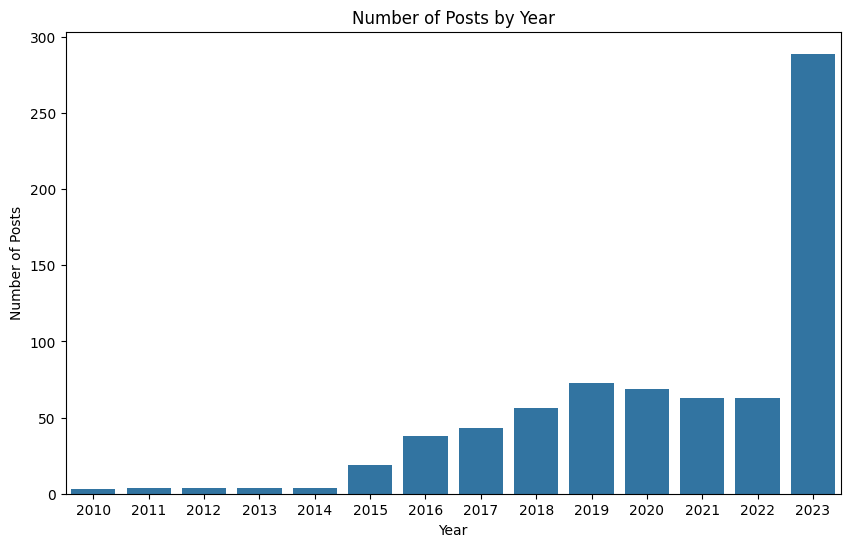

In [41]:
df.Year.value_counts()
counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year')
plt.title('Number of Posts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.show()

### From what months are these posts from?

Month
2     85
1     82
8     78
9     77
6     71
7     62
4     51
11    49
10    48
5     46
3     44
12    39
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='count'>

Text(0.5, 1.0, 'Number of Posts by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Posts')

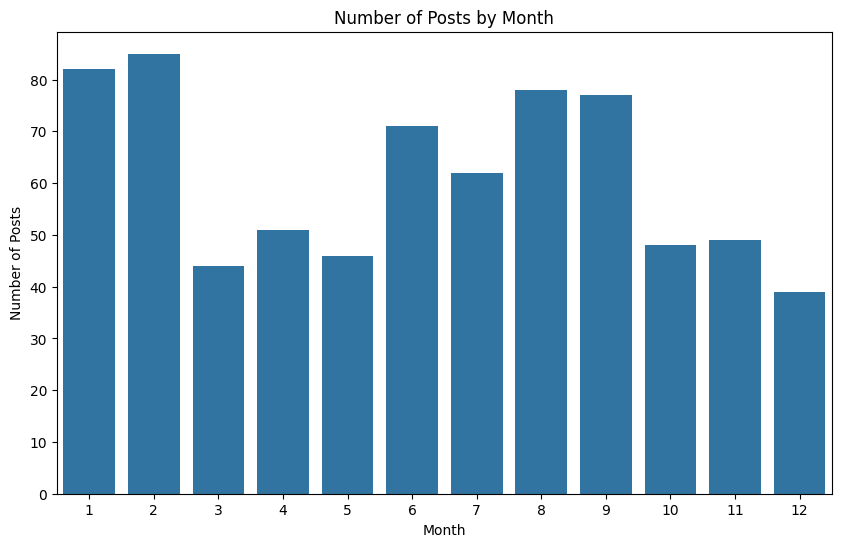

In [42]:
df.Month.value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Number of Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()

### Earliest/Latest Posts

In [43]:
min_dt = df.Timestamp.min()
max_dt = df.Timestamp.max()
print('Earliest post: ' + min_dt + '\n' + 'Latest post: ' + max_dt)

Earliest post: 2010-05-15 15:30:00
Latest post: 2023-10-22 20:45:00


### Value Counts

In [44]:
df.Sentiment.value_counts()
df.Platform.value_counts()
df.Country.value_counts()
#df.User.value_counts()

Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
                        ..
Celestial Wonder         1
Nature's Beauty          1
Thrilling Journey        1
Whispers of the Past     1
Relief                   1
Name: count, Length: 191, dtype: int64

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Sweden              2
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Jordan              1
Peru                1
Maldives            1
China               1
Cambodia            1
Norway              1
Colombia            1
Ireland             1
Jamaica             1
Kenya               1
Scotland            1
Thailand            1
Name: count, dtype: int64

### Scatter plot to check correlation between likes and reposts

Platform
Facebook     231
Twitter      243
Instagram    258
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Likes and Reposts')

Text(0.5, 0, 'Reposts')

Text(0, 0.5, 'Likes')

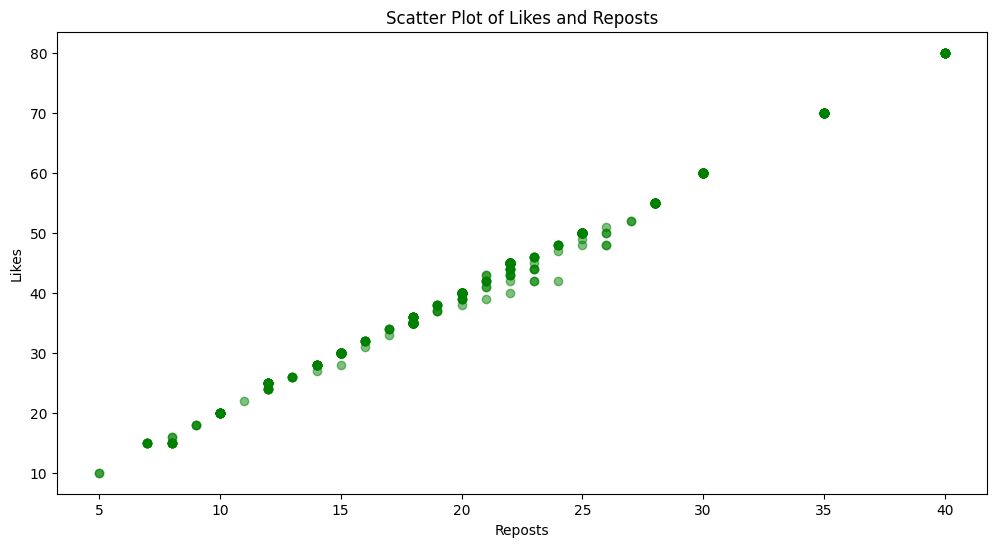

In [45]:
df.value_counts('Platform', ascending=True)
plt.figure(figsize=(12, 6))
plt.scatter(df['Reposts'], df['Likes'], color='green', alpha=0.5)
plt.title('Scatter Plot of Likes and Reposts')
plt.xlabel('Reposts')
plt.ylabel('Likes')

### Platform Sentiments

In [46]:
fb_sentiment = df.loc[df['Platform'] == 'Facebook'].Sentiment.value_counts()
print('\n Counts for Facebook: Sentiment \n', fb_sentiment)
ig_sentiment = df.loc[df['Platform'] == 'Instagram'].Sentiment.value_counts()
print('\n Counts for Instagram: Sentiment \n', ig_sentiment)
twt_sentiment = df.loc[df['Platform'] == 'Twitter'].Sentiment.value_counts()
print('\n Counts for Twitter: Sentiment \n', twt_sentiment)


 Counts for Facebook: Sentiment 
 Sentiment
Joy                 20
Positive            16
Excitement          11
Gratitude            7
Neutral              6
                    ..
Solace               1
Challenge            1
Surprise             1
Celestial Wonder     1
Ocean's Freedom      1
Name: count, Length: 99, dtype: int64

 Counts for Instagram: Sentiment 
 Sentiment
Positive             16
Joy                  14
Excitement           13
Contentment           7
Curiosity             6
                     ..
Joy in Baking         1
Creativity            1
Mischievous           1
Runway Creativity     1
Relief                1
Name: count, Length: 117, dtype: int64

 Counts for Twitter: Sentiment 
 Sentiment
Positive                13
Excitement              13
Joy                     10
Gratitude                7
Contentment              6
                        ..
Breakthrough             1
Renewed Effort           1
Mischievous              1
Creative Inspiration     1
W

### Pairplot

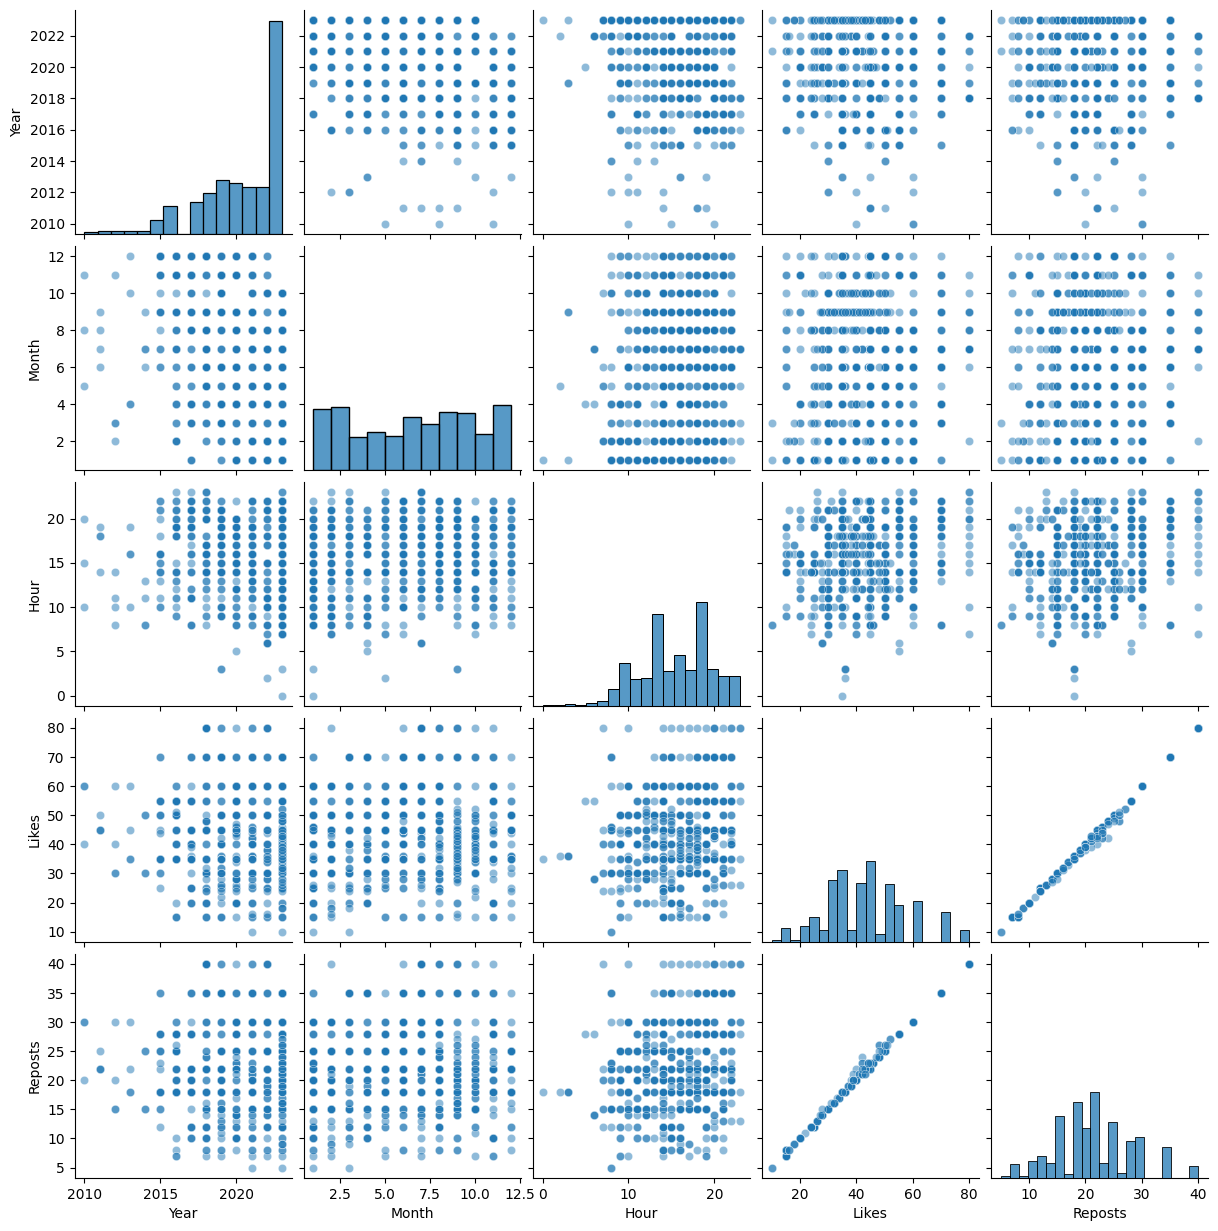

In [47]:
sns.pairplot(df, vars=['Year', 'Month', 'Hour', 'Likes', 'Reposts'], plot_kws={'alpha':0.5})